# RANSAC算法的实际效果

目标：使用scikit-img中的ransac算法进行直线拟合，调整参数达到最好效果

背景：三维空间中的平面拟合，普通方式计算量较大。

新思路：
1. 先在三维空间中切片，得到二维平面
2. 在二维平面中拟合直线
3. 利用拟合的直线再去做平面拟合，可能的方式
    * 如果直线拟合效果较好，则直接采用直线拟合的斜率
    * 如果直线拟合效果不好，则利用拟合的直线去除outliers，减小计算量

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import LineModelND, ransac

In [2]:
file='./line/y800.npy'
raw_data=np.load(file)
x=raw_data[0]
y=raw_data[1]
data = np.column_stack([x, y])
x_min=min(x)
x_max=max(x)

In [3]:
## Define the plot function
def plot_result(model_robust, inliers,m=1,n=1,p=1):
    outliers = inliers == False
    # generate coordinates of estimated models
    line_x = np.arange(x_min,x_max)
    line_y_robust = model_robust.predict_y(line_x)
    
    plt.subplot(m,n,p)
    
    plt.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6,
            )#label='Inlier data')
    plt.plot(data[outliers, 0], data[outliers, 1], '.r', alpha=0.6,
            )#label='Outlier data')
#     ax.plot(line_x, line_y, '-k', label='Line model from all data')
    plt.plot(line_x, line_y_robust, '-b', )#label='Robust line model')
#     plt.legend(loc='lower left')
#     plt.show()

In [4]:
def mean_absolute_error(arr):
    return sum(abs(arr)) / len(arr)

## 1 residual_threshold
经过测试，改变residual_threshold对效果的影响最大

取值：float larger than 0

含义：Maximum distance for a data point to be classified as an inlier.

定义inliers离拟合直线的最大距离

model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                                   **residual_threshold=para**, max_trials=1000)

Text(0.5, 1.0, 'Para: 0.3, MAE: 3.56')

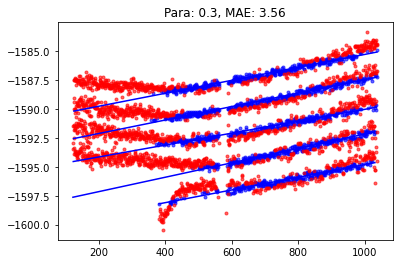

In [5]:
para=0.3
all_error=0
for slic in [700,725,750,775,800]:
    file=f'./line/y{slic}.npy'
    raw_data=np.load(file)
    x=raw_data[0]
    y=raw_data[1]
    data = np.column_stack([x, y])
    x_min=min(x)
    x_max=max(x)
    model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                                   residual_threshold=para, max_trials=1000)
    
    predict_y=model_robust.predict_y(x)
    arr=mean_absolute_error(predict_y-y)
    all_error=all_error+arr
    plot_result(model_robust,inliers)
all_error=round(all_error,2)
plt.title(f'Para: {para}, MAE: {all_error}')

In [7]:
y

array([-1587.5345, -1587.4583, -1587.3923, -1587.3408, -1587.5302,
       -1587.9368, -1587.5734, -1587.3898, -1587.52  , -1587.5817,
       -1587.5916, -1587.6599, -1587.7427, -1587.5076, -1587.1664,
       -1587.5077, -1587.6033, -1587.161 , -1587.5229, -1587.8499,
       -1587.7784, -1587.8102, -1587.89  , -1587.7595, -1587.8304,
       -1587.4227, -1587.4167, -1588.1057, -1587.6199, -1587.6233,
       -1587.7883, -1587.7227, -1587.8063, -1587.8833, -1587.8015,
       -1586.8339, -1587.2168, -1587.684 , -1587.1752, -1587.9789,
       -1587.7235, -1587.4248, -1588.1493, -1587.5217, -1587.5535,
       -1587.7932, -1587.1066, -1588.2006, -1588.2169, -1587.3013,
       -1587.2188, -1587.1708, -1587.3634, -1587.9374, -1588.3459,
       -1587.6653, -1587.4124, -1587.7445, -1587.6425, -1587.6633,
       -1587.746 , -1587.7329, -1587.5266, -1587.8459, -1587.3486,
       -1587.7679, -1588.29  , -1587.8754, -1588.0338, -1587.8752,
       -1587.906 , -1588.2209, -1588.0751, -1588.1959, -1587.9

### 1.1 调小residual_threshold的效果
造成结果不稳定

Text(0.5, 1.0, 'Para: 0.1, MAE: 3.47')

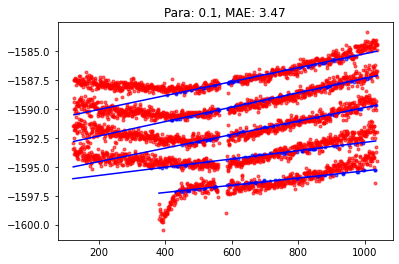

In [6]:
para=0.1
all_error=0
for slic in [700,725,750,775,800]:
    file=f'./line/y{slic}.npy'
    raw_data=np.load(file)
    x=raw_data[0]
    y=raw_data[1]
    data = np.column_stack([x, y])
    x_min=min(x)
    x_max=max(x)
    model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                                   residual_threshold=para, max_trials=1000)
    predict_y=model_robust.predict_y(x)
    arr=mean_absolute_error(predict_y-y)
    all_error=all_error+arr
    plot_result(model_robust,inliers)
all_error=round(all_error,2)
plt.title(f'Para: {para}, MAE: {all_error}')

（蓝色点是inliers，红色是outliers）

### 1.2 调大residual_threshold的效果

Text(0.5, 1.0, 'Para: 0.8, MAE: 2.63')

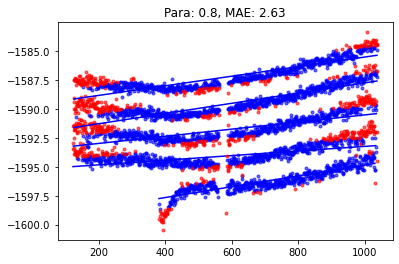

In [7]:
para=0.8
all_error=0
for slic in [700,725,750,775,800]:
    file=f'./line/y{slic}.npy'
    raw_data=np.load(file)
    x=raw_data[0]
    y=raw_data[1]
    data = np.column_stack([x, y])
    x_min=min(x)
    x_max=max(x)
    model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                                   residual_threshold=para, max_trials=1000)
    predict_y=model_robust.predict_y(x)
    arr=mean_absolute_error(predict_y-y)
    all_error=all_error+arr
    plot_result(model_robust,inliers)
all_error=round(all_error,2)
plt.title(f'Para: {para}, MAE: {all_error}')

## 2. max_trials 迭代次数

RANSAC有几个停止条件，如果其他的没有特别指定，那么就会进行max_trials次数的更新

但是RANSAC的更新条件是inliers的个数变多，如果个数一样，就按有最小residual error的算

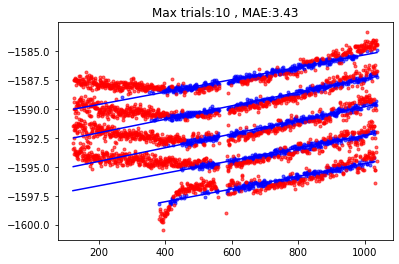

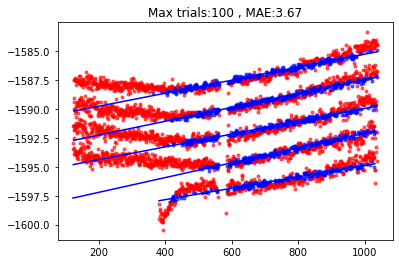

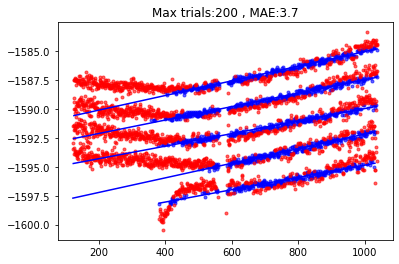

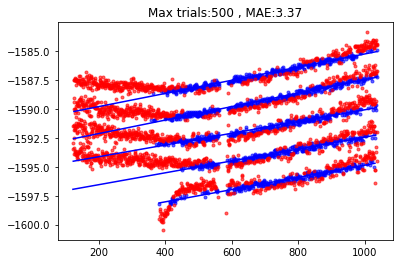

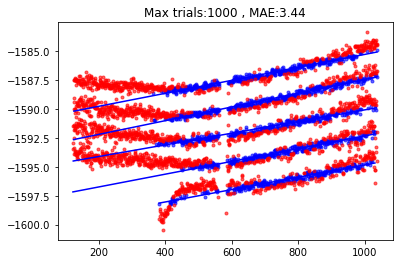

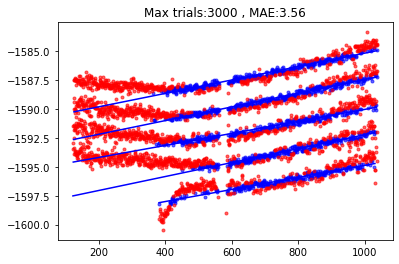

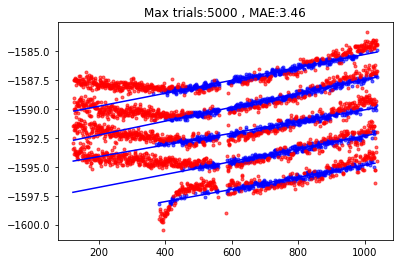

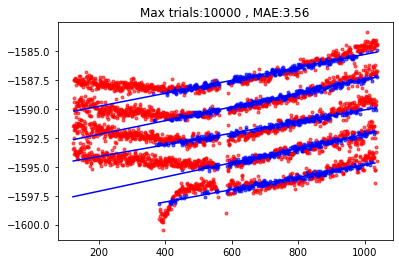

In [8]:
para_list=[10,100,200,500,1000,3000,5000,10000]
for para in para_list: 
    all_error=0
    for slic in [700,725,750,775,800]:
        file=f'./line/y{slic}.npy'
        raw_data=np.load(file)
        x=raw_data[0]
        y=raw_data[1]
        data = np.column_stack([x, y])
        x_min=min(x)
        x_max=max(x)
        model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                                       residual_threshold=0.3, max_trials=para)
        predict_y=model_robust.predict_y(x)
        arr=mean_absolute_error(predict_y-y)
        all_error=all_error+arr
        plot_result(model_robust,inliers)
    all_error=round(all_error,2)
    plt.title(f'Max trials:{para} , MAE:{all_error}')
    plt.show()

可以看出增加最大迭代次数对效果并没有特别大的提升，或者说几十次的迭代已经能够带来足够好的结果

下面使用网格搜索的方式，观察迭代次数2-99对结果的影响，可见由于是随机化的结果，所以MAE并没有下降的趋势

Text(0, 0.5, 'MAE')

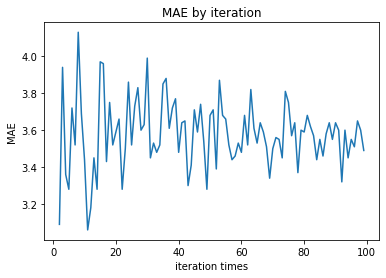

In [9]:
para_list=[i for i in range(2,100)]

error_his=[]
for para in para_list: 
    all_error=0
    mse_error=0
    for slic in [700,725,750,775,800]:
        file=f'./line/y{slic}.npy'
        raw_data=np.load(file)
        x=raw_data[0]
        y=raw_data[1]
        data = np.column_stack([x, y])
        x_min=min(x)
        x_max=max(x)
        model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                                       residual_threshold=0.3, max_trials=para)
        predict_y=model_robust.predict_y(x)
        arr=mean_absolute_error(predict_y-y)
        
        all_error=all_error+arr
#         plot_result(model_robust,inliers)
    all_error=round(all_error,2)
    error_his.append(all_error)

plt.plot(para_list,error_his)
plt.title('MAE by iteration')
plt.xlabel('iteration times')
plt.ylabel('MAE')

## 3. 计算耗时


In [10]:
%timeit -n 10 -r 10 model_robust, inliers = ransac(data, LineModelND, min_samples=2,residual_threshold=0.3, max_trials=1000)

53.4 ms ± 314 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


验证次数：10次运行，每次跑100遍

平均53.7ms (在每台电脑上可能不一样)

## 4. 结果稳定性
因为RANSAC算法具有随机性，因此测试每次运行的结果是否能保持一致

通过下面的结果可以看出，总体来说还是较为稳定的（在residual_threshold选择恰当的情况下）

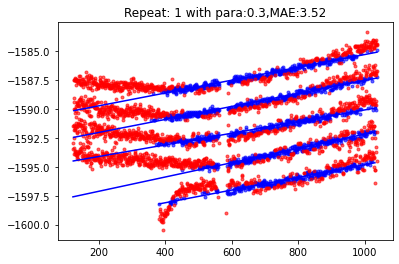

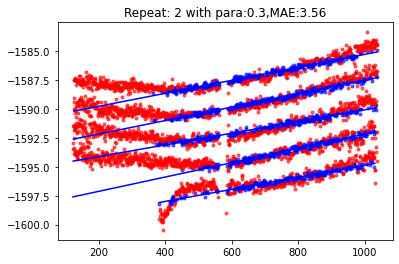

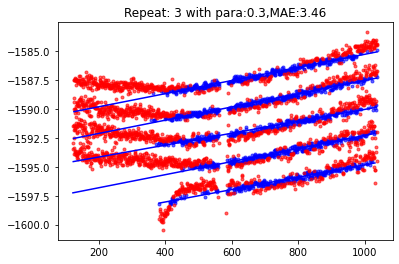

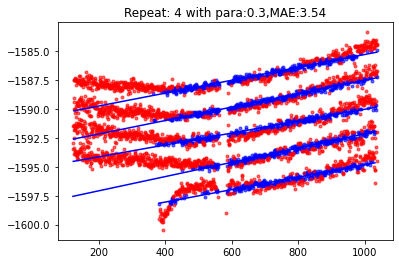

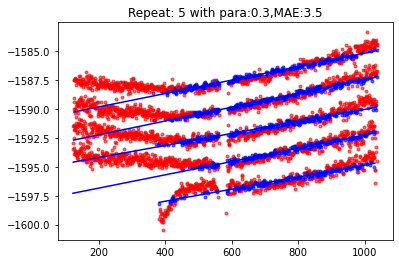

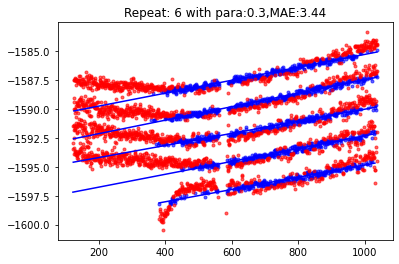

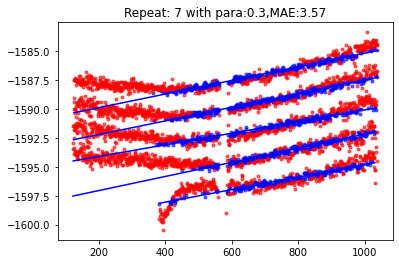

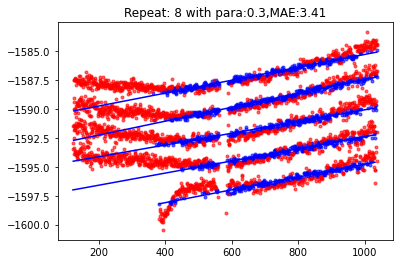

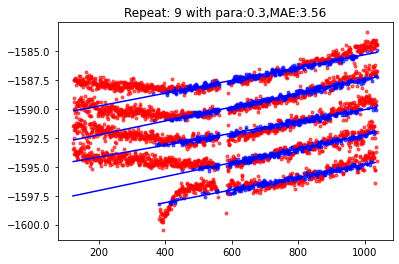

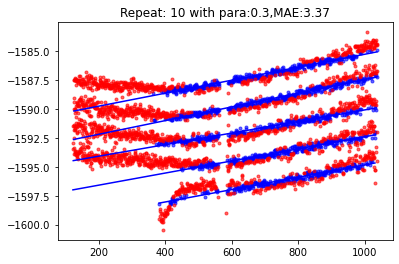

In [11]:
for ntimes in range(10):
    para=0.3
    all_error=0
    for slic in [700,725,750,775,800]:
        file=f'./line/y{slic}.npy'
        raw_data=np.load(file)
        x=raw_data[0]
        y=raw_data[1]
        data = np.column_stack([x, y])
        x_min=min(x)
        x_max=max(x)
        model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                                       residual_threshold=para, max_trials=1000)
        predict_y=model_robust.predict_y(x)
        arr=mean_absolute_error(predict_y-y)
        all_error=all_error+arr
        plot_result(model_robust,inliers)
    all_error=round(all_error,2)
    plt.title(f'Repeat: {ntimes+1} with para:{para},MAE:{all_error}')
    plt.show()